In [1]:
#Import tools 
#pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD #stochastic gradient descent 
import seaborn as sns 
from matplotlib import ticker

In [ ]:
#Import data 
#Read the matlab data

data_mat = loadmat('T215_4_000_1.mat')
#print(data_mat)

#take just the wind pressure coefficient matrix
cp = data_mat["Wind_pressure_coefficients"]

#n= number of timesteps 
n  = np.shape(cp)[0]
print(n)
#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n
# x = the time at each point 
x = np.linspace(0, T, n, False) 
tap_no = 95


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Front Facing Tap Number {}'.format(tap_no))             
plt.show()





32768


In [ ]:
#Do the same but for a right side tap 
tap_no = 103


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Right Side Tap Number {}'.format(tap_no))             
plt.show()

In [1]:
#Do the same but for a back tap 
tap_no = 111


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time [s]')
#plt.suptitle('Tap )
plt.title('Back Side Tap Number {}'.format(tap_no))             
plt.show()

NameError: name 'cp' is not defined

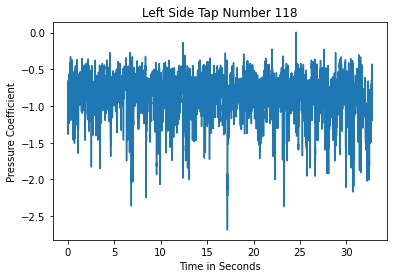

In [13]:
#Do the same but for a left Side tap 
tap_no = 118


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Left Side Tap Number {}'.format(tap_no))             
plt.show()

In [1]:
#split the data into training, validating, and testing 

tap_no = 118
y = cp[:, tap_no-1]


train_size  = int(n*0.8)
valid_size  = int(n*0.1)
test_size  = int(n*0.1)

print("Train set size: {}, Validation set size: {}, Test set size: {}"
      .format(train_size, valid_size, test_size))

#training data
train_x  = x[:train_size] 
train_y  = y[:train_size]

#validating data 
valid_x  = x[train_size:train_size + valid_size]
valid_y  = y[train_size:train_size + valid_size]

#test data
test_x  = x[-test_size:] 
test_y  = y[-test_size:]


NameError: name 'cp' is not defined

32768


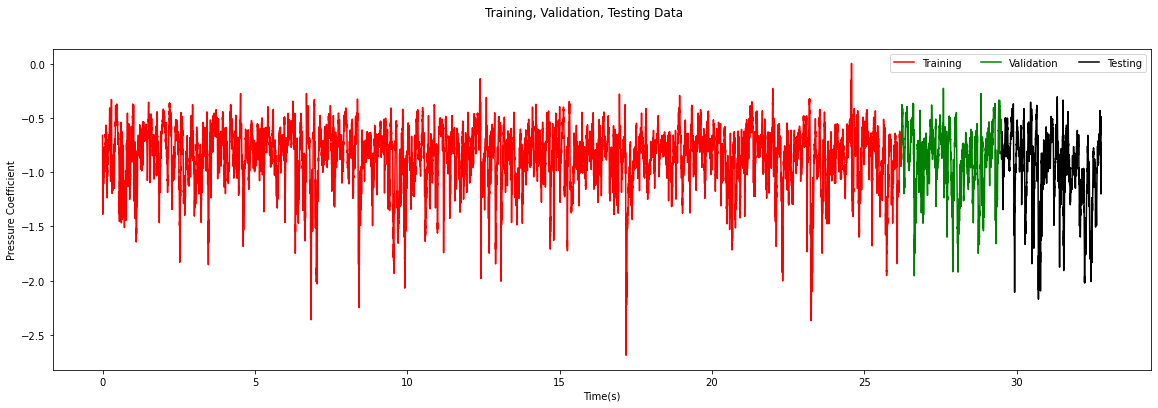

In [25]:
#n= number of timesteps 
n  = np.shape(cp)[0]
print(n)
#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n
# x = the time at each point 
x = np.linspace(0, T, n, False)



fig, (ax) = plt.subplots()
fig.suptitle('Training, Validation, Testing Data')
#ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Pressure Coefficient')
ax.plot(x[:train_size], y[:train_size], 'r-', linewidth=1.5)
ax.plot(x[train_size:train_size+valid_size], 
         y[train_size:train_size+valid_size], 'g-', linewidth=1.5)
ax.plot(x[-test_size:], y[-test_size:], 'k-', linewidth=1.5)
#ax.set_xlim(left=0, right=5)
#ax.set_ylim(bottom=0, top=5)

ax.legend(['Training', 'Validation', 'Testing'], ncol=3, frameon=True) 
fig.set_size_inches(50/2.54, 15/2.54) 
#plt.tight_layout()
#fig.savefig('Plots/MLP_devided_data_sample.pdf')
#fig.savefig('Plots/MLP_devided_data_sample.png')
#plt.show()

In [ ]:
#train_x  = x[:train_size] 
#train_y  = y[:train_size]


#Convert to torch format
train_x_tor = torch.from_numpy(train_x.astype(np.float32))
train_y_tor = torch.from_numpy(train_y.astype(np.float32))

valid_x_tor = torch.from_numpy(valid_x.astype(np.float32))
valid_y_tor = torch.from_numpy(valid_y.astype(np.float32))

test_x_tor = torch.from_numpy(test_x.astype(np.float32))
test_y_tor = torch.from_numpy(test_y.astype(np.float32))


